In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.4
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
torvoipsimple <- read_csv("./process-cli.csv")

Parsed with column specification:
cols(
  run = col_double(),
  measure = col_character(),
  owd = col_double()
)



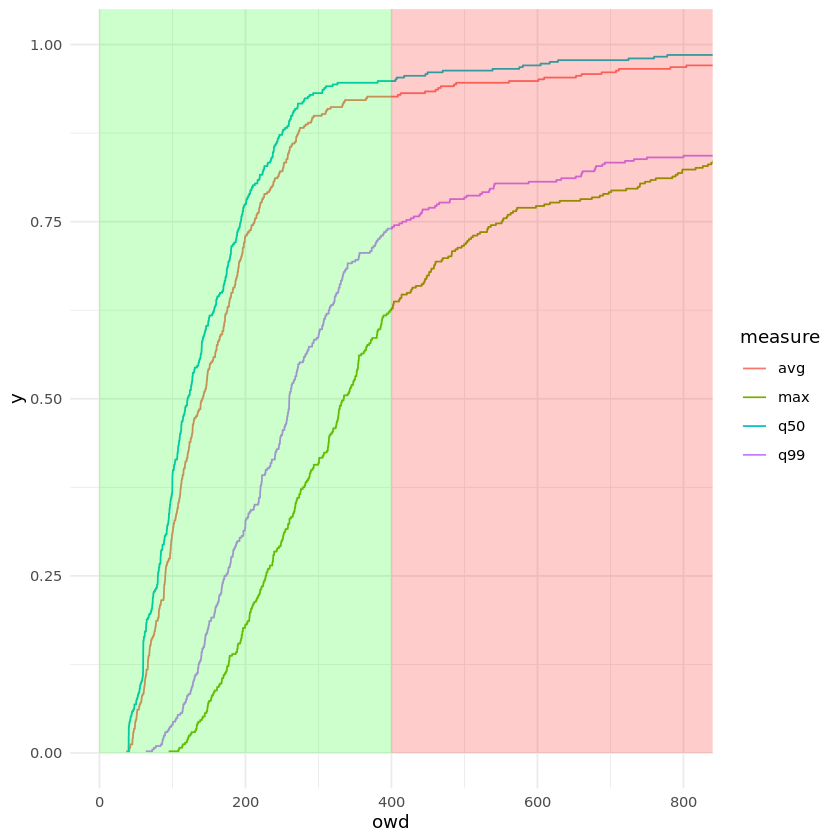

In [14]:
ggplot(torvoipsimple %>% filter(measure == 'q50' | measure == 'avg' | measure == 'max' | measure == 'q99'), aes(x=owd, group=measure, color=measure)) +
  stat_ecdf(pad=FALSE) + 
  coord_cartesian(xlim=c(0,800)) + 
  annotate("rect", xmin = 0, xmax = 400, ymin = 0, ymax = Inf, alpha = 0.2, fill='green') +
  annotate("rect", xmin = 400, xmax = Inf, ymin = 0, ymax = Inf, alpha = 0.2, fill='red') +
  theme_minimal() +
  ggsave("torsimple.pdf", width=24, height=12,units="cm")

In [14]:
amr122 <- read_csv("./donarv4/amr122.csv") %>% sample_frac(0.1)
amr122$u1 %>% length

Parsed with column specification:
cols(
  u1 = col_double(),
  u2 = col_double(),
  u3 = col_double(),
  `Call Duration` = col_double()
)



[1] 117627

In [217]:
amr122  %>% summarise(n=mean(`Call Duration`))

n       
1 201.6349

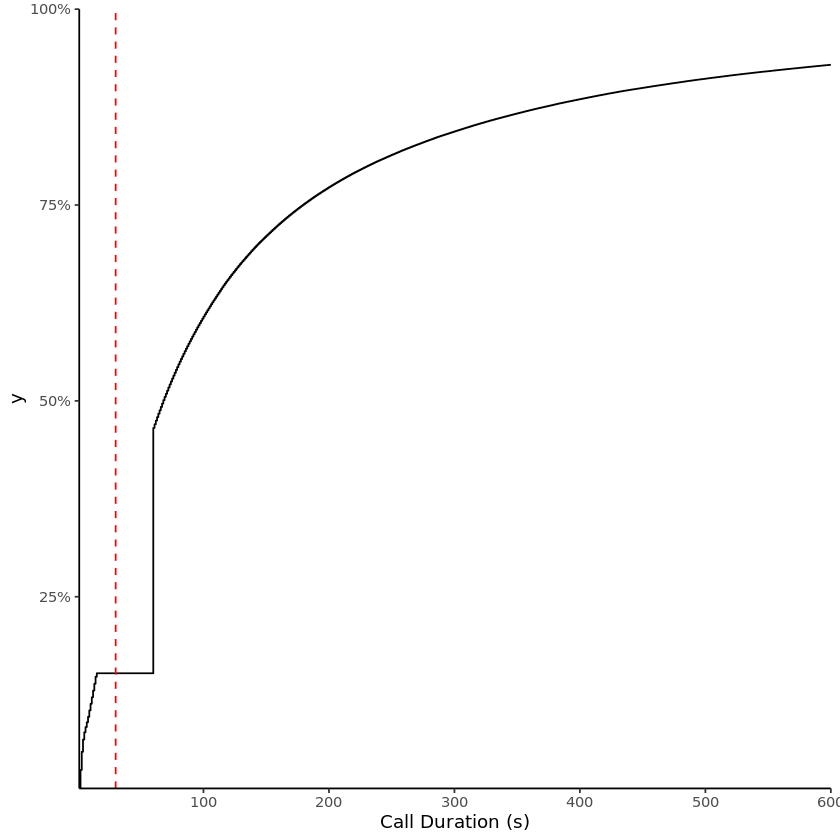

In [218]:

ggplot(amr122, aes(x=`Call Duration`)) +
  stat_ecdf(pad=FALSE) +
  coord_cartesian(xlim=c(1,600)) +
  scale_x_continuous(expand = c(0, 0)) + 
  scale_y_continuous(expand = c(0, 0), labels = scales::percent_format()) + 
  geom_vline(xintercept=30, color="red", linetype= "dashed") +
  theme_classic() +
  xlab("Call Duration (s)") +
  ggsave("./donarv4/cd.pdf", width=12, height=6,units="cm")

In [ ]:
g729 <- read_csv("./donarv4/g729.csv") %>% sample_frac(0.1)

Parsed with column specification:
cols(
  u1 = col_double(),
  u2 = col_double(),
  u3 = col_double(),
  `Call Duration` = col_double()
)



In [ ]:
cds <- bind_rows(g729 %>% mutate(codec='g729'), amr122 %>% mutate(codec='amr122')) 
glimpse(cds)

In [221]:
cds %>% filter(codec  == 'amr122') %>% summary

       u1              u2                u3         Call Duration    
 Min.   : 0.00   Min.   :  0.000   Min.   :  0.00   Min.   :    1.0  
 1st Qu.:81.00   1st Qu.:  0.000   1st Qu.: 30.00   1st Qu.:   60.0  
 Median :82.00   Median :  0.000   Median : 60.00   Median :   68.0  
 Mean   :80.08   Mean   :  7.301   Mean   : 54.57   Mean   :  201.6  
 3rd Qu.:82.00   3rd Qu.:  9.000   3rd Qu.: 80.00   3rd Qu.:  179.0  
 Max.   :93.00   Max.   :100.000   Max.   :100.00   Max.   :23073.0  
    codec          
 Length:1176266    
 Class :character  
 Mode  :character  
                   
                   
                   

In [ ]:
cds$codec <- factor(cds$codec, levels=c("g729", "amr122"))
ggplot(cds, aes(x=`Call Duration`, group=codec, linetype=codec)) +
  stat_ecdf(pad=FALSE) +
  scale_color_grey() +
  coord_cartesian(xlim=c(1,600)) +
  scale_x_continuous(expand = c(0, 0)) + 
  scale_y_continuous(expand = c(0, 0), labels = scales::percent_format()) + 
  theme_classic() +
  ylab("% of calls") +
  xlab("Call Duration (s)") +
  labs(color="State of the art", linetype="Codec") +
  ggsave("./donarv4/cd2.pdf", width=12, height=6,units="cm")

In [4]:
aggr <- read_csv("./donarv4/aggr.csv")

Parsed with column specification:
cols(
  xp = col_character(),
  uuid = col_character(),
  metric = col_character(),
  value = col_double()
)



In [9]:
aggr %>% filter(metric == 'count') %>% arrange(value) %>% head

xp          uuid                                 metric value
1 analysis-1w 674dd498-e87f-47ae-9722-12e9fb144e0c count   200 
2 analysis-1w 63ddf652-acd4-4968-a314-76dbe9cb85b8 count  6710 
3 analysis-1w a21758aa-17b6-4535-9b56-5a9ef1e4fd24 count  7413 
4 analysis-1w bca56cbc-04be-44d8-b88b-1605ff604984 count  7493 
5 analysis-1w 40810b30-95c0-46b0-b783-83e5e92e608e count  7495 
6 analysis-1w 75bf90e4-7bf7-4aed-a1d8-af5ebc971f29 count  7495

In [3]:
longrun <- read_csv("./bundle.csv") %>% mutate(value = value / 1000)
longrun$conf <- factor(longrun$conf, levels=c("Default", "2 hops", "1 way anon."))
longrun$strat <- factor(longrun$strat, levels=c("Donar Alternate", "Donar Double Send", "Torfone", "Simple"))

Parsed with column specification:
cols(
  strat = col_character(),
  conf = col_character(),
  uuid = col_character(),
  metric = col_character(),
  value = col_double(),
  call_duration = col_character()
)



In [25]:
longrun %>% filter(metric == 'q99') %>% group_by(call_duration, conf, strat) %>% summarise(ok=sum((value < 360)) / n())

call_duration conf        strat             ok        
1  5 min         Default     Donar Alternate   0.45882353
2  5 min         Default     Donar Double Send 0.86842105
3  5 min         Default     Torfone           0.43010753
4  5 min         Default     Simple            0.08849558
5  5 min         2 hops      Donar Alternate   0.85057471
6  5 min         2 hops      Donar Double Send 0.91578947
7  5 min         2 hops      Torfone           0.34905660
8  5 min         2 hops      Simple            0.44347826
9  5 min         1 way anon. Donar Alternate   0.65476190
10 5 min         1 way anon. Donar Double Send 0.98809524
11 5 min         1 way anon. Torfone           0.35135135
12 5 min         1 way anon. Simple            0.07017544
13 90 min        Default     Donar Alternate   0.57647059
14 90 min        Default     Donar Double Send 0.86842105
15 90 min        Default     Torfone           0.31182796
16 90 min        Default     Simple            0.02654867
17 90 min        2 hops      Donar Alternate   0.87356322
18 90 min        2 hops      Donar Double Send 0.94736842
19 90 min        2 hops      Torfone           0.25471698
20 90 min        2 hops      Simple            0.22608696
21 90 min        1 way anon. Donar Alternate   0.77380952
22 90 min        1 way anon. Donar Double Send 0.96428571
23 90 min        1 way anon. Torfone           0.22972973
24 90 min        1 way anon. Simple            0.01754386

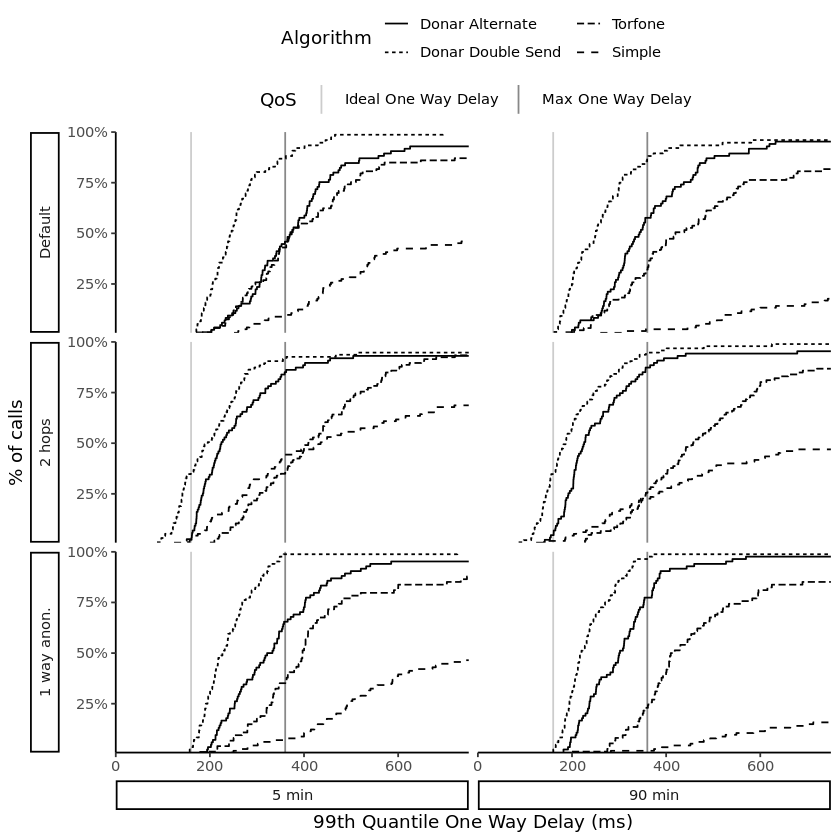

In [5]:
qos <- data.frame(delay = c(360, 160), metric = c("Max One Way Delay","Ideal One Way Delay"))
ggplot(longrun %>% filter(metric == 'q99'), aes(x=value, group=strat, linetype=strat)) +
  geom_vline(aes(xintercept=delay, color=metric), data=qos) +
  stat_ecdf(pad=FALSE) +
  scale_x_continuous(expand = c(0, 0)) +
  scale_y_continuous(expand = c(0, 0), labels=scales::percent) +
  scale_colour_manual(values = c("#cccccc", "#888888")) +
  coord_cartesian(xlim=c(0,750)) +
  guides(linetype = guide_legend(nrow=2)) +
  ylab("% of calls") +
  xlab("99th Quantile One Way Delay (ms)") +
  labs(color="QoS", linetype="Algorithm") +
  facet_grid(conf ~ call_duration, scales = "free", switch="both") +
  theme_classic() +
  theme(legend.position="top", legend.box="vertical", legend.margin=margin(), strip.placement="outside") + 
  ggsave("./eval1.pdf",  width=12, height=14,units="cm")

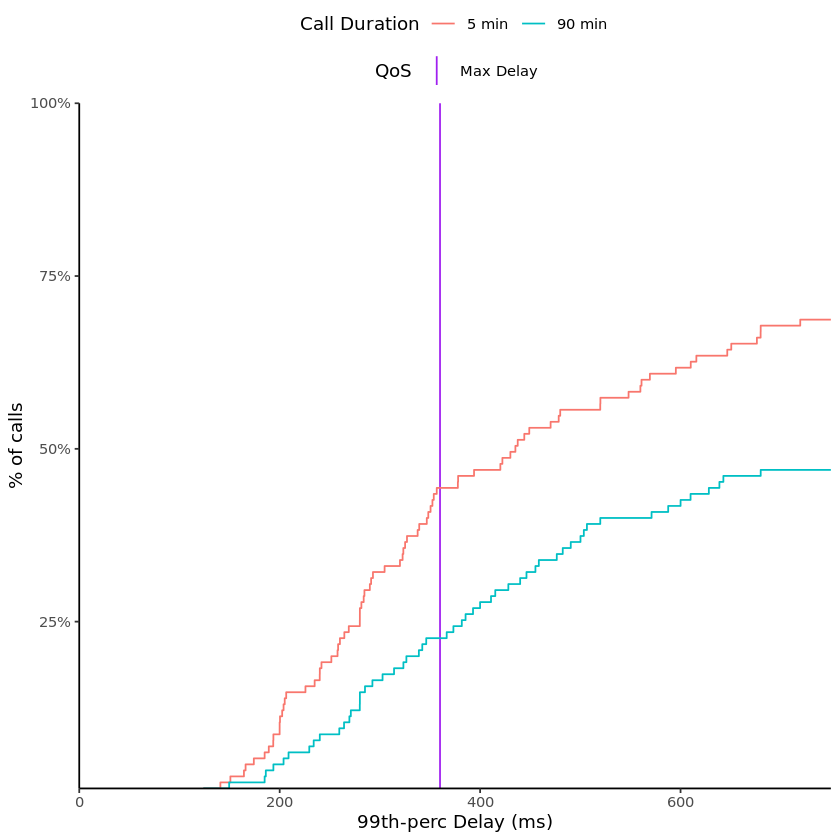

In [27]:
qos <- data.frame(delay = c(360), metric = c("Max Delay"))
ggplot(longrun %>% filter(metric == 'q99' & conf == '2 hops' & strat == 'Simple'), aes(x=value, group=call_duration, color=call_duration)) +
  geom_vline(aes(xintercept=delay, linetype=metric),color='purple', data=qos) +
  stat_ecdf(pad=FALSE) +
  scale_x_continuous(expand = c(0, 0)) +
  scale_y_continuous(expand = c(0, 0), labels=scales::percent) +
  coord_cartesian(xlim=c(0,750)) +
  guides(linetype = guide_legend(nrow=1)) +
  ylab("% of calls") +
  xlab("99th-perc Delay (ms)") +
  labs(linetype="QoS", color="Call Duration") +
  theme_classic() +
  theme(legend.position="top", legend.box="vertical", legend.margin=margin()) + 
  ggsave("./x2.pdf",  width=10, height=10,units="cm")

In [27]:
torlinkscmp <- read_csv("./donarv4/torlinkscmp2.csv") %>% mutate(value = value / 1000)
torlinkscmp$call_duration <- factor(torlinkscmp$call_duration, levels=c("90 min", "5 min", "30 sec"))


Parsed with column specification:
cols(
  link = col_character(),
  anon = col_character(),
  uuid = col_character(),
  metric = col_character(),
  value = col_double(),
  call_duration = col_character()
)



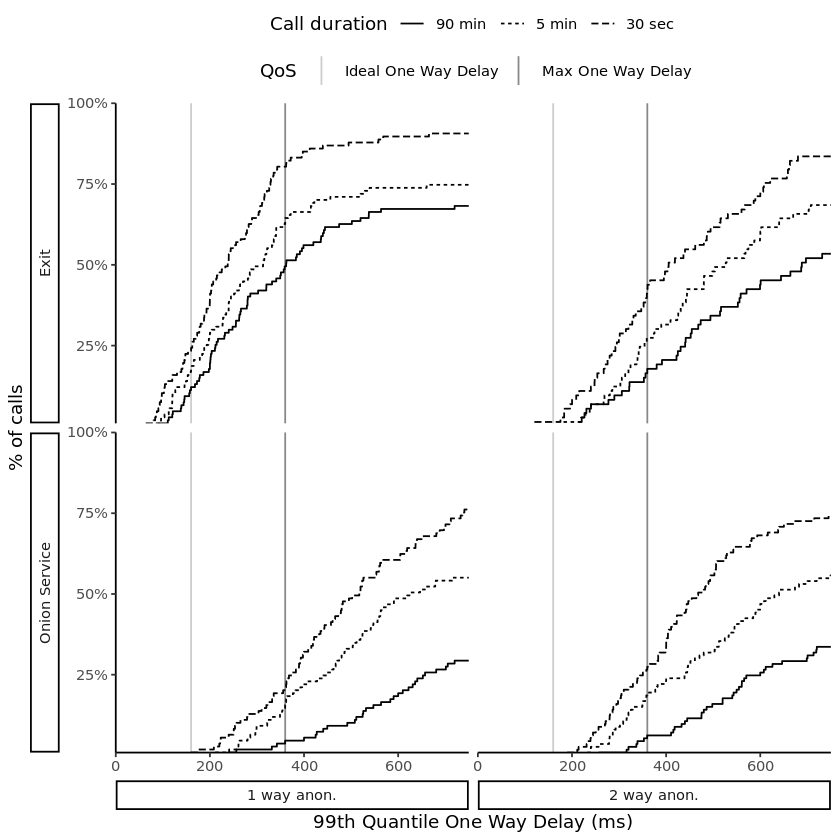

In [23]:
# todo: replot but grouped by link type instead!
ggplot(torlinkscmp %>% filter(metric == 'q99'), aes(x=value, group=call_duration, linetype=call_duration)) +
  geom_vline(aes(xintercept=delay, color=metric), data=qos) +
  scale_colour_manual(values = c("#cccccc", "#888888")) +
  stat_ecdf(pad=FALSE) +
  facet_grid(link ~ anon, scales = "free", switch="both") +
  theme_classic() +
  xlab("99th Quantile One Way Delay (ms)") +
  ylab("% of calls") +
  labs(color="QoS", linetype="Call duration") +
  scale_x_continuous(expand = c(0, 0)) +
  scale_y_continuous(expand = c(0, 0), labels=scales::percent) +
  coord_cartesian(xlim=c(0,750)) +
  theme(legend.position="top", legend.box="vertical", legend.margin=margin(), strip.placement="outside") +  
  ggsave("./donarv4/eval2.pdf",  width=12, height=10, units="cm")

In [29]:
torlinkscmp %>% filter(metric == 'q99') %>% group_by(call_duration, link, anon) %>% summarise(ok=sum((value < 360)) / n())

call_duration link          anon        ok        
1  90 min        Exit          1 way anon. 0.49532710
2  90 min        Exit          2 way anon. 0.17808219
3  90 min        Onion Service 1 way anon. 0.04587156
4  90 min        Onion Service 2 way anon. 0.06194690
5  5 min         Exit          1 way anon. 0.63551402
6  5 min         Exit          2 way anon. 0.27397260
7  5 min         Onion Service 1 way anon. 0.15596330
8  5 min         Onion Service 2 way anon. 0.18584071
9  30 sec        Exit          1 way anon. 0.80373832
10 30 sec        Exit          2 way anon. 0.42465753
11 30 sec        Onion Service 1 way anon. 0.20183486
12 30 sec        Onion Service 2 way anon. 0.27433628

In [129]:
torlinkscmp %>% filter(metric == 'count' & ((value > 134.980 & call_duration == '90 min') | (value > 7.480 & call_duration == '5 min')| (value > 0.720 & call_duration == '30 sec'))) %>% select(uuid) -> no_break 

In [134]:
no_break %>% summary
torlinkscmp %>% filter(metric == 'count') %>% summary

     uuid          
 Length:1200       
 Class :character  
 Mode  :character  

     link               uuid              metric              value        
 Length:1259        Length:1259        Length:1259        Min.   :  0.189  
 Class :character   Class :character   Class :character   1st Qu.:  0.750  
 Mode  :character   Mode  :character   Mode  :character   Median :  7.500  
                                                          Mean   : 44.281  
                                                          3rd Qu.:134.995  
                                                          Max.   :135.000  
 call_duration     
 Length:1259       
 Class :character  
 Mode  :character  
                   
                   
                   

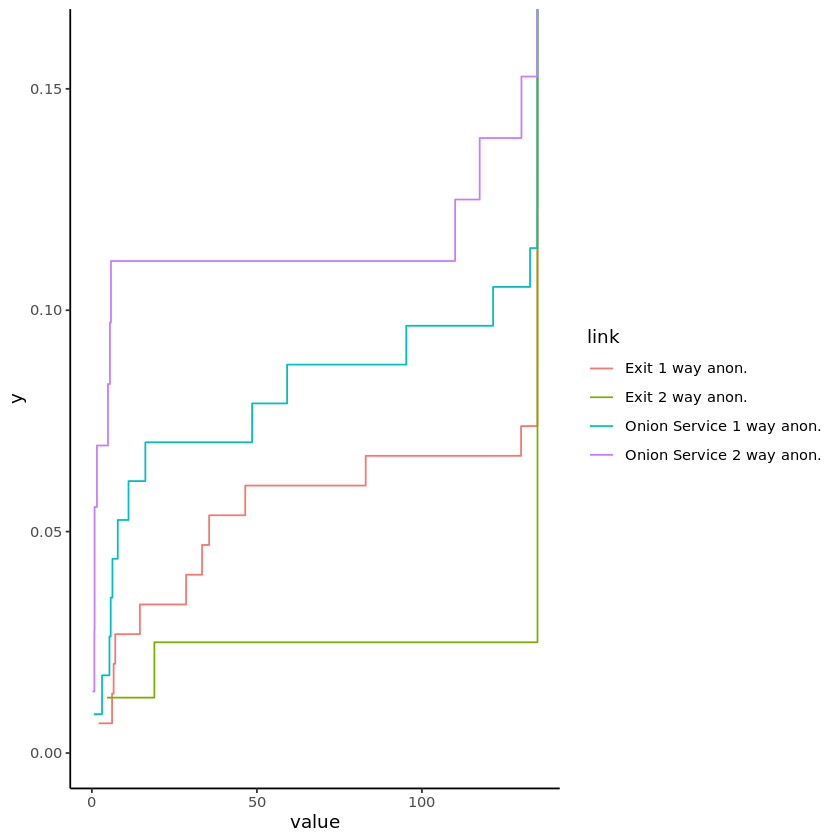

In [144]:
ggplot(torlinkscmp %>% filter(metric == 'count' & call_duration == '90 min'), aes(x=value, group=link, color=link)) +
  stat_ecdf(pad=FALSE) + 
  coord_cartesian(ylim=c(0,0.16)) +
  theme_classic()

In [153]:
min90 <- read_csv("./donarv4/135000.csv")


Parsed with column specification:
cols(
  algo = col_character(),
  uuid = col_character(),
  metric = col_character(),
  value = col_double()
)



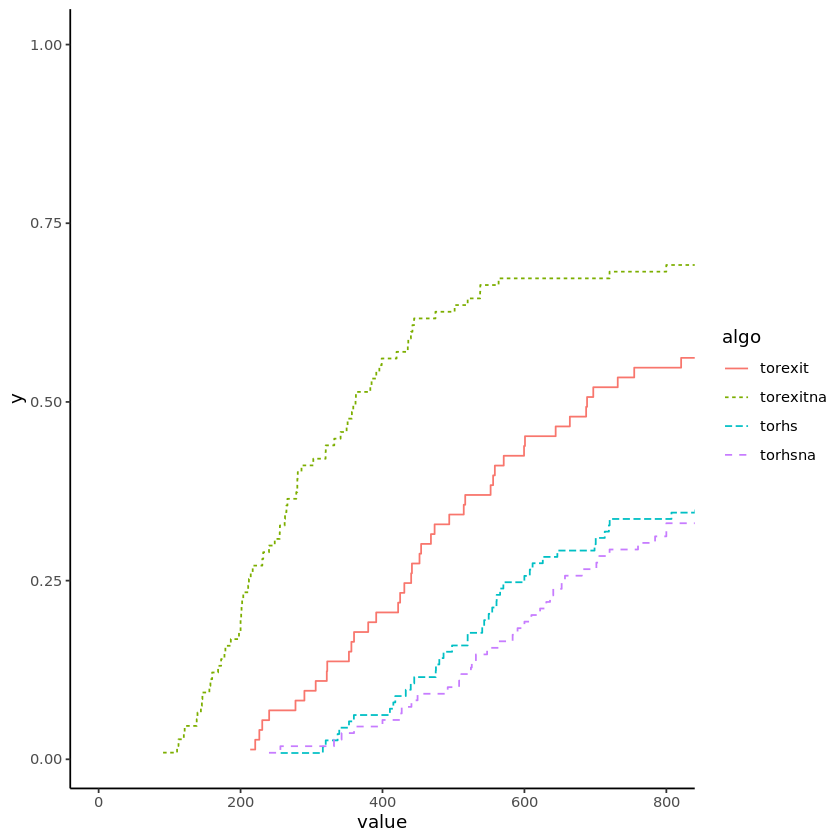

In [154]:
ggplot(min90 %>% filter(metric == 'q99') %>% mutate(value = value / 1000), aes(x=value, group=algo, linetype=algo, color=algo)) + stat_ecdf(pad=FALSE) + coord_cartesian(xlim=c(0,800)) + theme_classic()

Parsed with column specification:
cols(
  algo = col_character(),
  uuid = col_character(),
  metric = col_character(),
  value = col_double()
)



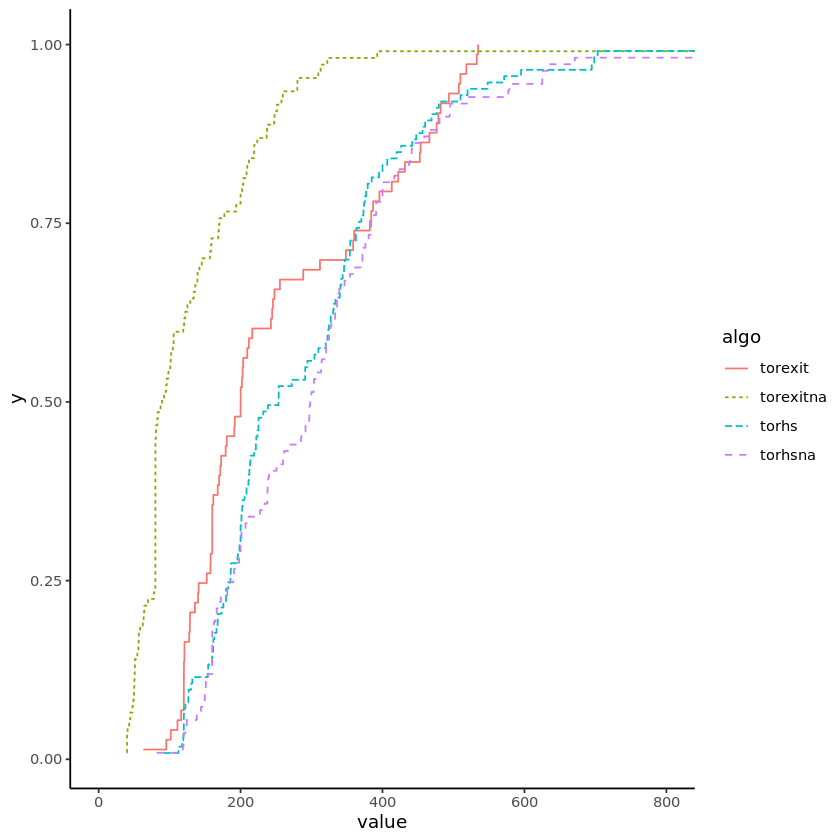

In [170]:
e7501 <- read_csv("./donarv4/130001.csv")
ggplot(e7501 %>% filter(metric == 'med') %>% mutate(value = value / 1000), aes(x=value, group=algo, linetype=algo, color=algo)) + stat_ecdf(pad=FALSE) + coord_cartesian(xlim=c(0,800)) + theme_classic()